# Решение домашнего задания #1

In [130]:
from matplotlib import pyplot as plt
from torchvision.transforms import v2
from torchvision.io import decode_image

(-0.5, 568.5, 507.5, -0.5)

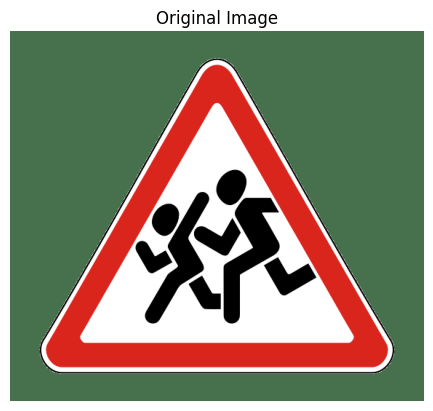

In [131]:
example_image = decode_image("../../data/example_sign.png", mode="RGB")

plt.imshow(example_image.permute(1, 2, 0))
plt.title("Original Image")
plt.axis("off")

In [132]:
transfrom_gallery = [
    v2.Resize(size=(256, 256)),
    v2.RandomShortestSize(min_size=16, max_size=512),
    v2.RandomHorizontalFlip(p=1),
    v2.Pad(padding=10, fill=0, padding_mode="constant"),
    v2.RandomAffine(degrees=45, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    v2.RandomSolarize(threshold=250, p=1),
    v2.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    v2.RandomRotation(degrees=45),
    v2.RandomCrop(size=(224, 224)),
    v2.GaussianBlur(kernel_size=11, sigma=(1.1, 2.0)),
    v2.RandomPerspective(distortion_scale=0.2, p=1, interpolation=v2.InterpolationMode.BILINEAR),
    v2.RandomErasing(p=1, scale=(0.02, 0.1)),
]

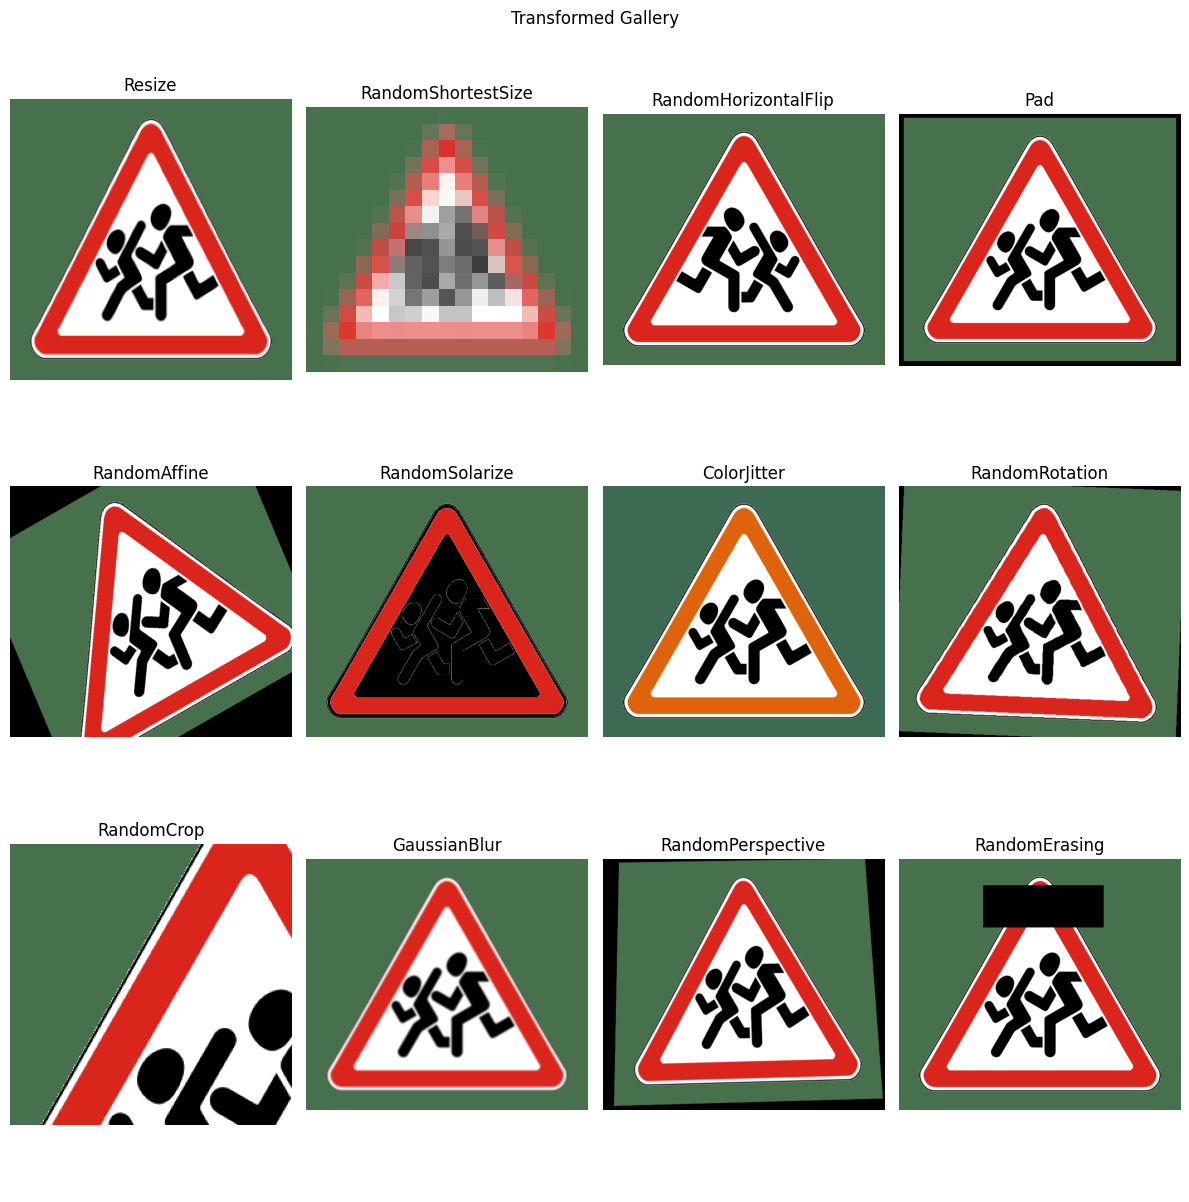

In [133]:
plt.figure(figsize=(12, 12))
plt.title("Transformed Gallery")
plt.axis("off")

grid_size = 3, 4
num_images = grid_size[0] * grid_size[1]

# Loop through the list of images and plot them with subplot
for i in range(num_images):
    transformation = transfrom_gallery[i % len(transfrom_gallery)]

    transformed_image = transformation(example_image)
    plt.subplot(grid_size[0], grid_size[1], i + 1)
    plt.title(transformation.__class__.__name__)
    plt.imshow(transformed_image.permute(1, 2, 0))
    plt.axis("off")

plt.tight_layout()
plt.show()

In [134]:
transforms = v2.Compose([ # Transform pipeline for the sign images
    v2.Resize(size=(256, 256)),                                                                          # Resize the sign to equal height and width
    v2.RandomHorizontalFlip(p=0.5),                                                                 # Randomly flip the image horizontally with a 50% chance
    v2.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),                   # Randomly translate, scale, and shear the image
    v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),                          # Randomly change brightness, contrast, saturation, and hue
    v2.RandomRotation(degrees=15),                                                                  # Randomly rotate the image by up to 15 degrees
    v2.RandomPerspective(distortion_scale=0.2, p=0.5, interpolation=v2.InterpolationMode.BILINEAR), # Randomly apply a perspective transformation
    v2.RandomErasing(p=0.5, scale=(0.02, 0.1)),                                                     # Randomly erase a portion of the image
])

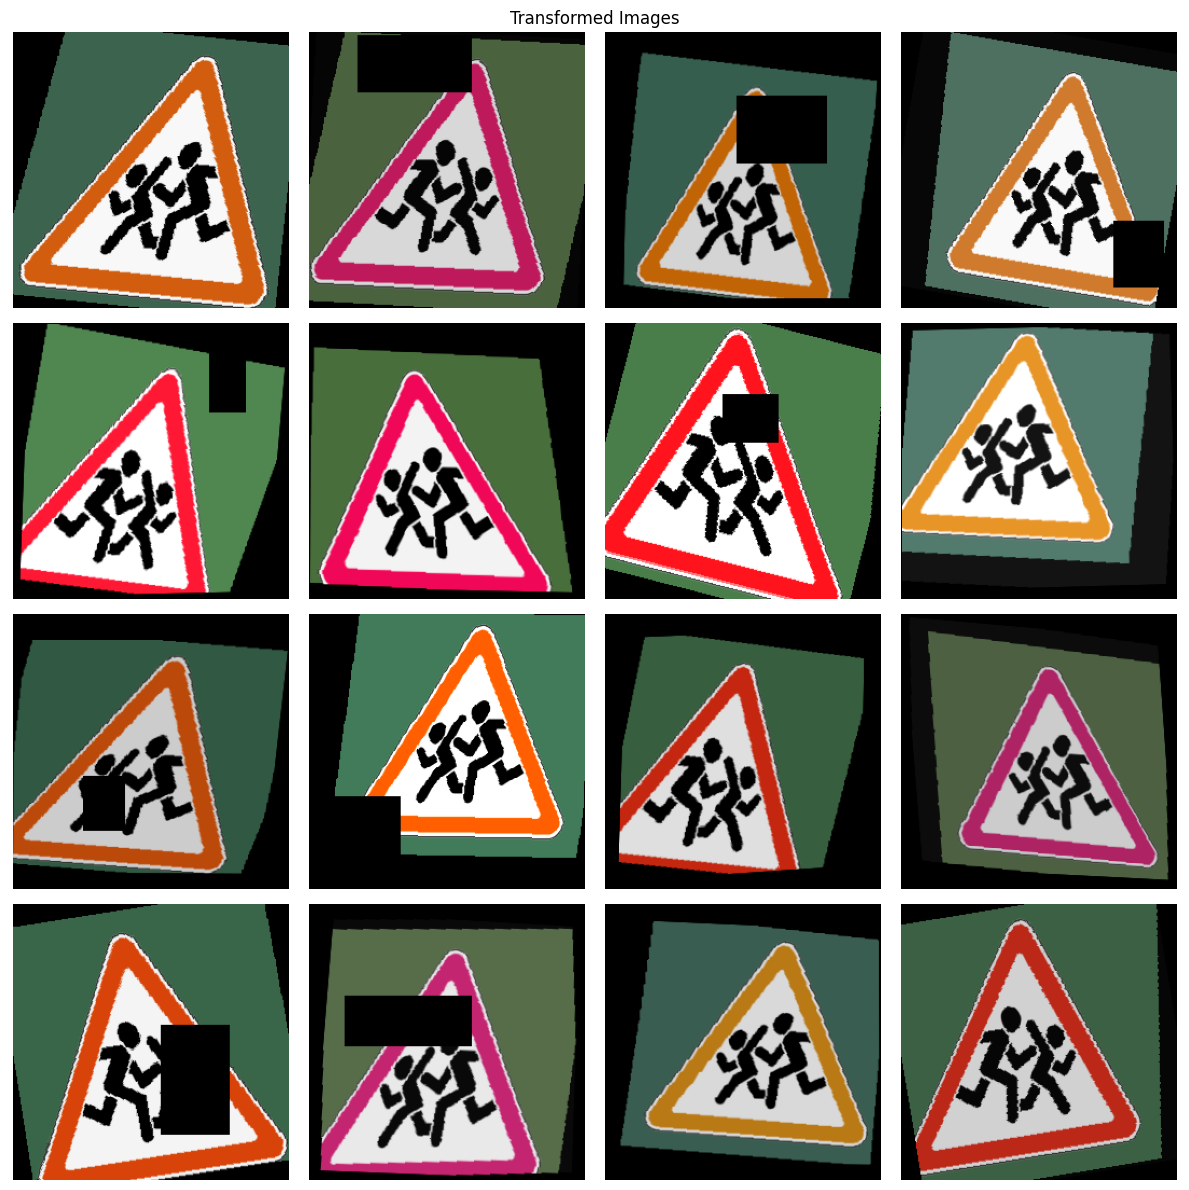

In [135]:
plt.figure(figsize=(12, 12))
plt.title("Transformed Images")
plt.axis("off")

grid_size = 4, 4
num_images = grid_size[0] * grid_size[1]

# Loop through the list of images and plot them with subplot
for i in range(num_images):
    transformed_image = transforms(example_image)
    plt.subplot(grid_size[0], grid_size[1], i + 1)
    plt.imshow(transformed_image.permute(1, 2, 0))
    plt.axis("off")

plt.tight_layout()
plt.show()

Вывод: аугментация позволяет создавать изображения, которые выглядят по-разному, но содержат одинаковую информацию. Это помогает улучшить обобщающую способность модели и уменьшить переобучение, а также позволяет использовать меньшие наборы данных для обучения, что экономит ресурсы для размерки.